## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from tqdm import tqdm
import glob
import os
from time import sleep
import fnmatch

## Load clean data

In [2]:
fomc_rates = pd.read_csv('inputs/Clean_Data/Clean_Rates.csv')
sp500_ret = pd.read_csv('inputs/Clean_Data/Clean_sp500_ret.csv')
stock_tv = pd.read_csv('inputs/Clean_Data/Clean_stock_tv.csv')
Vbilx = pd.read_csv('inputs/Clean_Data/Clean_Vbilx.csv')
Vbirx= pd.read_csv('inputs/Clean_Data/Clean_Vbirx.csv')

## Assemble Data Frames

In [3]:
sp500_ret = sp500_ret.rename(columns = {'date': 'Date','Daily Returns' : 'SP_daily_ret', 'Price': 'SP_daily_price' })

In [4]:
Vbirx
Vbirx = Vbirx.rename(columns = {'Daily Returns' : 'VBIRX_daily_ret', 'Price': 'VBIRX_daily_price' })
Vbirx = Vbirx.rename(columns = {'Daily Price': 'VBIRX_daily_price' })
Vbirx

,VBIRX_daily_ret,VBIRX_daily_price,Date
0,0.000000,9.131982,2015-01-02
1,0.000953,9.140685,2015-01-05
2,0.000953,9.149393,2015-01-06
3,0.000952,9.158100,2015-01-07
4,-0.000951,9.149393,2015-01-08
...,...,...,...
2086,0.000000,9.990000,2023-04-18
2087,-0.001001,9.980000,2023-04-19
2088,0.002004,10.000000,2023-04-20
2089,0.000000,10.000000,2023-04-21


In [5]:
Vbilx = Vbilx.rename(columns = {'Daily Price': 'VBILX_daily_price', 'Daily Returns' : 'VBLIX_daily_ret' })
Vbilx

,VBLIX_daily_ret,VBILX_daily_price,Date
0,0.004348,9.113114,2015-01-05
1,0.004329,9.152565,2015-01-06
2,0.000000,9.152565,2015-01-07
3,-0.002586,9.128894,2015-01-08
4,0.003457,9.160455,2015-01-09
...,...,...,...
2085,0.001938,10.340000,2023-04-18
2086,-0.001934,10.320000,2023-04-19
2087,0.003876,10.360000,2023-04-20
2088,-0.001930,10.340000,2023-04-21


In [6]:
sp500_ret = sp500_ret.rename(columns = {'returns' : 'sp500_ret'})
sp500_ret

,Date,S&P_500,sp500_ret
0,2015-01-05,2020.58,-0.018278
1,2015-01-06,2002.61,-0.008893
2,2015-01-07,2025.90,0.011630
3,2015-01-08,2062.14,0.017888
4,2015-01-09,2044.81,-0.008404
...,...,...,...
2085,2023-04-18,4154.87,0.000855
2086,2023-04-19,4154.52,-0.000084
2087,2023-04-20,4129.79,-0.005953
2088,2023-04-21,4133.52,0.000903


In [7]:
stock_tv
stock_tv.drop_duplicates(inplace=True)
stock_tv = stock_tv.rename(columns = {'Value' : 'sp500_tv'})
stock_tv

,Date,sp500_tv
0,12/2/15,1088000.0
1,12/3/15,1379000.0
2,12/4/15,1308000.0
3,12/7/15,712744.0
4,12/8/15,670998.0
...,...,...
489,3/31/23,3293000.0
490,4/3/23,2494000.0
491,4/4/23,2687000.0
492,4/5/23,2311000.0


In [8]:
final_data = sp500_ret.merge(Vbilx, 
              on=['Date'],
              how='left',
              validate='one_to_one') # or 'many_to_one'

In [9]:
final_data2 = final_data.merge(Vbirx, on=['Date'],
              how='left',
              validate='one_to_one')

### Create Dummy Variable

In [10]:
fomc_rates 
fomc_rates['Change'] = np.where(fomc_rates['Increase'] > 0,1,0)
fomc_rates

,Date,Increase,Decrease,Tgt_level,Change
0,2015-12-17,25.0,0.0,0.25.0.50,1
1,2016-12-15,25.0,0.0,0.50.0.75,1
2,2017-03-16,25.0,0.0,0.75.1.00,1
3,2017-06-15,25.0,0.0,1.00.1.25,1
4,2017-12-14,25.0,0.0,1.25.1.50,1
5,2018-03-22,25.0,0.0,1.50.1.75,1
6,2018-06-14,25.0,0.0,1.75.2.00,1
7,2018-09-27,25.0,0.0,2.00.2.25,1
8,2018-12-20,25.0,0.0,2.25.2.50,1
9,2019-08-01,0.0,25.0,2.00.2.25,0


### Create Event Time Variable

In [11]:
pd.set_option('display.max_rows',70)

In [12]:
event_time_rets = (
    final_data2.merge(fomc_rates[['Date']], on = ["Date"], how = 'left', 
                      validate = 'm:1', indicator = True)
    
    # create event flag, then use this to create event_id
    .assign(event = lambda x: (x['_merge'] == 'both').astype(int))    
    .assign(event_id = lambda x: x['event'].cumsum(),
            date2 = lambda x: x['Date'])
    
    # reduce dataframe to [-10,+10] around event
    # event id starts 10 days before event and goes to 10 days after
    .assign(event_id = lambda x: x['event_id'].shift(-10))
    .query('event_id > 0')
    .groupby('event_id').head(20)
    
    # helper columns
    .assign(increment =lambda x: np.arange(len(x)),
            inc_at_e = lambda x: x['event']*x['increment'])
    
    #inc_at_e alwasy equal to increment # at firms event
    .assign(inc_at_e = lambda x: x.groupby('event_id')['inc_at_e'].transform(sum))
    
    #compute event time
    .assign(event_time = lambda x: x['increment'] -x['inc_at_e'])
   
    # clear out useless columns
    .drop(['_merge','date2','increment','inc_at_e'],axis=1)
    # .query('event_id == 13')
    # .iloc[:,-8:]
    
    .query('event_id != 13 & event_id != 14')
)

In [13]:
# we need a new var = the date of the event so that we can merge in fomc_rate vars

# Create a new column 'date_when_var2_is_1' and set it to NaN initially
event_time_rets['event_id_date'] = np.nan

# Find the date from 'var1' when 'var2' is equal to 1 for each 'event_id'
date_when_var2_is_1 = event_time_rets[event_time_rets['event'] == 1].groupby('event_id')['Date'].first()

# Iterate through the unique event_ids and set the 'date_when_var2_is_1' value for each event_id
for event_id, date_value in date_when_var2_is_1.items():
    event_time_rets.loc[event_time_rets['event_id'] == event_id, 'event_id_date'] = date_value
    

In [14]:
# now merge in fomc_rate date
event_time_rets = event_time_rets.merge(fomc_rates,
                      left_on = 'event_id_date',
                      right_on = 'Date',
                      how = 'left',
                      validate = 'm:1').drop('Date_y',axis=1)

In [15]:
event_time_rets.eval('change = Increase - Decrease', inplace = True)
event_time_rets.eval('Increase = Increase > 0',inplace=True)

In [16]:
event_time_rets.drop(['Decrease', 'Tgt_level','Change'],axis=1,inplace=True)

In [17]:
for_class = event_time_rets.head()

In [18]:
for_class.to_csv('inputs/Presentation_Data/presentation_sample.csv', index=False)

## Correlation Matrix

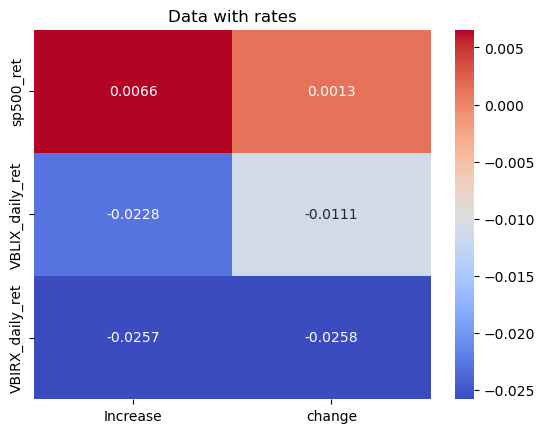

In [19]:
corr_matrix = event_time_rets.corr().iloc[[1,2,4],-2:]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Data with rates')
plt.show()

## Event Time Study Figures

Figures:

1. All 3 assets (one chart without error bars) for Increase == 1
2. All 3 assets (one chart without error bars) for Increase == 0
3. SP with hue for Increase
4. repeat for asset2
5. repeat for asset3

### plot one - Increase remove error bars, then Layer on other two assets...

In [20]:
event_time_rets_for_increase = event_time_rets.query('Increase == True')

In [21]:
melted_data = pd.melt(event_time_rets_for_increase, 
                      id_vars=['event_time'], 
                      value_vars=['sp500_ret', 'VBLIX_daily_ret', 'VBIRX_daily_ret'], 
                      var_name='asset')

/var/folders/c2/m9k0t3cx7ll7gxptyf12gq680000gn/T/ipykernel_45923/268843140.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_data,


Text(0.5, 1.0, 'Returns after rate increases')

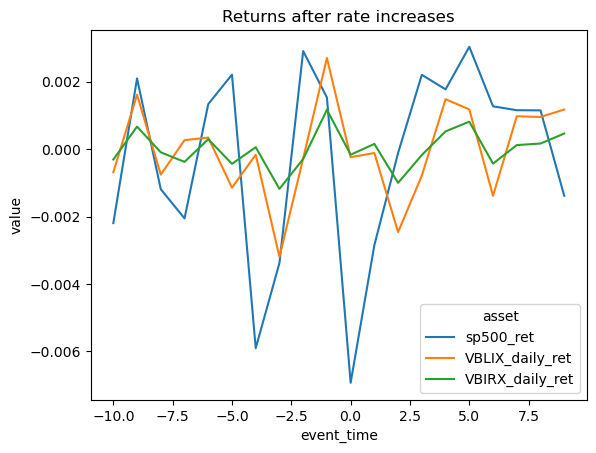

In [22]:
sns.lineplot(data=melted_data,
             x='event_time',
             y= 'value',
             hue = 'asset',
             ci = None)
plt.title('Returns after rate increases')

### Plot 2 - plot one but with  decrease 

In [23]:
event_time_rets_for_decrease = event_time_rets.query('Increase == False')

In [24]:
melted_data = pd.melt(event_time_rets_for_decrease, id_vars=['event_time'], value_vars=['sp500_ret', 'VBLIX_daily_ret', 'VBIRX_daily_ret'], var_name='asset')

In [25]:
melted_data

,event_time,asset,value
0,-10,sp500_ret,0.003582
1,-9,sp500_ret,-0.006177
2,-8,sp500_ret,0.002829
3,-7,sp500_ret,0.006848
4,-6,sp500_ret,0.004688
...,...,...,...
175,5,VBIRX_daily_ret,-0.002835
176,6,VBIRX_daily_ret,0.000000
177,7,VBIRX_daily_ret,0.000000
178,8,VBIRX_daily_ret,0.000948


/var/folders/c2/m9k0t3cx7ll7gxptyf12gq680000gn/T/ipykernel_45923/3735965716.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_data,


Text(0.5, 1.0, 'Returns after rate decreases')

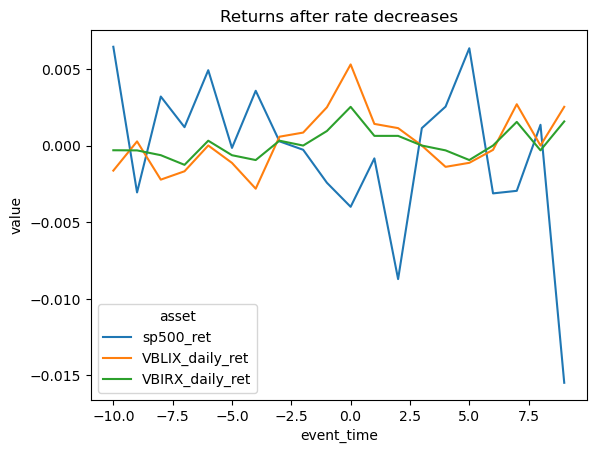

In [26]:
sns.lineplot(data=melted_data,
             x='event_time',
             y='value',
             hue = 'asset',
             ci = None)
plt.title('Returns after rate decreases')

### Plot 3 - S&P 500 with Hue for Increase`

/var/folders/c2/m9k0t3cx7ll7gxptyf12gq680000gn/T/ipykernel_45923/1425936233.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=event_time_rets,


<AxesSubplot: xlabel='event_time', ylabel='sp500_ret'>

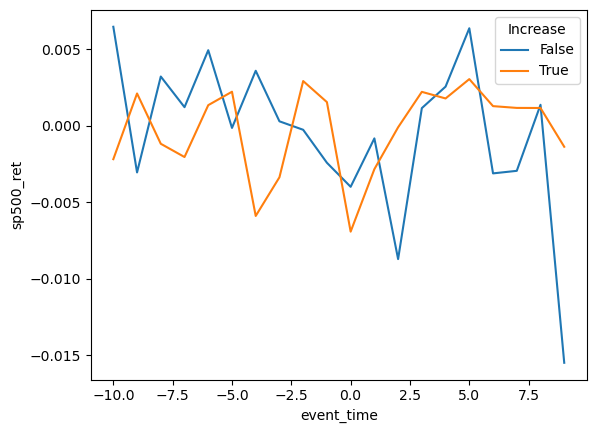

In [27]:
sns.lineplot(data=event_time_rets,
             x='event_time',
             y='sp500_ret',
             ci = None,
            hue= 'Increase')

### Plot 4 - VBIRX with Hue for Increase`

/var/folders/c2/m9k0t3cx7ll7gxptyf12gq680000gn/T/ipykernel_45923/841638572.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=event_time_rets,


<AxesSubplot: xlabel='event_time', ylabel='VBIRX_daily_ret'>

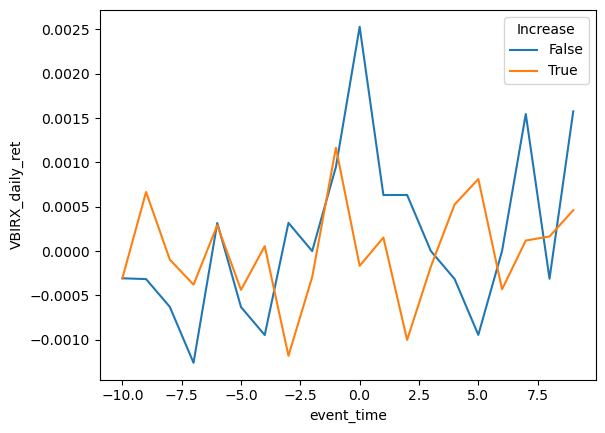

In [28]:
sns.lineplot(data=event_time_rets,
             x='event_time',
             y='VBIRX_daily_ret',
             ci = None,
            hue= 'Increase')

### Plot  - VBLIX with Hue for Increase

/var/folders/c2/m9k0t3cx7ll7gxptyf12gq680000gn/T/ipykernel_45923/3889906557.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=event_time_rets,


<AxesSubplot: xlabel='event_time', ylabel='VBLIX_daily_ret'>

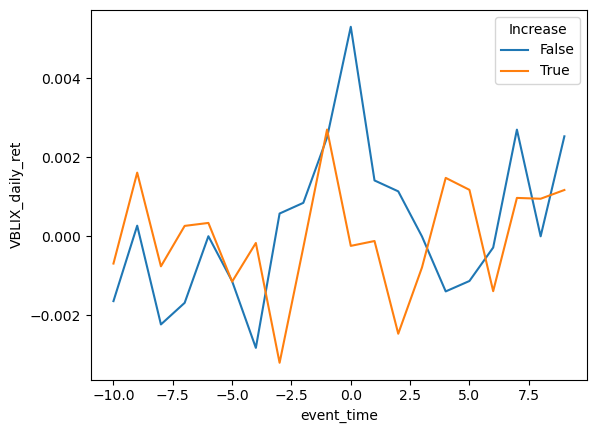

In [29]:
sns.lineplot(data=event_time_rets,
             x='event_time',
             y='VBLIX_daily_ret',
             ci = None,
            hue= 'Increase')

In [30]:
for_class.to_csv('inputs/Final_Data/Final_Dataset.csv', index=False)